#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [5]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

data = pd.read_csv('stock.csv')
data.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [6]:
# Sort the stock data by date
data = data.sort_values(by = 'Date')
data.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [7]:
# Print out the number of stocks
print('Total number of stocks is : {}'.format(len(data.columns)-1))

Total number of stocks is : 9


In [9]:
# Print the name of stocks
print('Stocks under consideration are :')
for _ in data.columns[1:]:
    print(_)

Stocks under consideration are :
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [11]:
print('What is the average return of the S&P500?')
data.sp500.mean()

What is the average return of the S&P500?


2218.7495540592877

In [15]:
data.std()

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [13]:
print('What is the maximum price for AMZN stock over the specified time period?')
data.AMZN.max()

What is the maximum price for AMZN stock over the specified time period?


3225.0

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [18]:
# Check if data contains any null values
data.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [19]:
# Getting dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 265.5+ KB


In [20]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df,fig_title):
    df.plot(x = 'Date', figsize = (20,7),linewidth = 4,title = fig_title)
    plt.grid()
    plt.show()

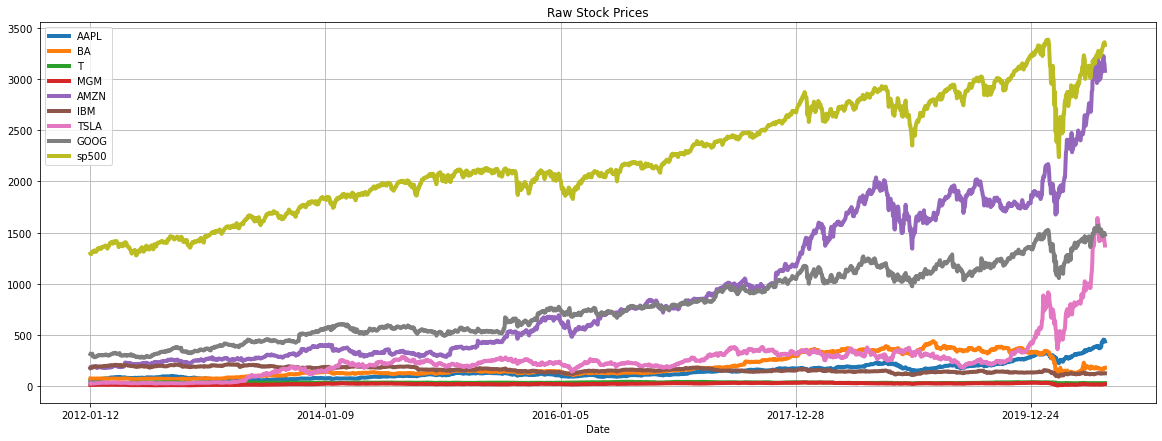

In [21]:
# Plot the data
show_plot(data,'Raw Stock Prices')

In [22]:
def norms(df):
    x = df.copy()
    for _ in x.columns[1:]:
       x[_]= x[_]/x[_][0] 
    return x


In [23]:
norms(data)

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

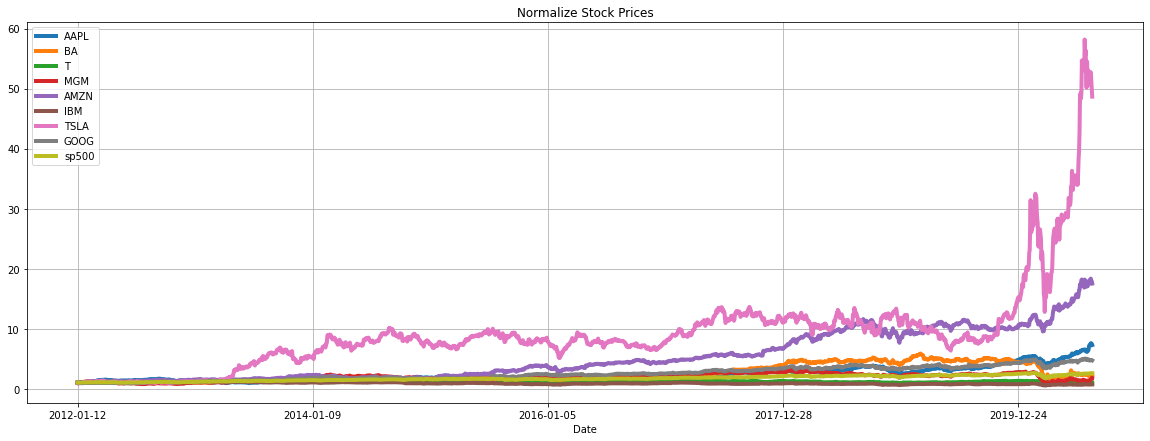

In [26]:
show_plot(norms(data),'Normalize Stock Prices')

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [27]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 
def interactive_plot(df,title):
    fig = px.line(title = title)

    for e in data.columns[1:]:
        fig.add_scatter(x = df.Date ,y = df[e] ,name = e)
    
    fig.show()

In [28]:
# Plot interactive chart
interactive_plot(data,'Prices')

In [30]:
interactive_plot(norms(data),'Normalized Prices')

In [33]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020 
feb_19 = 3386.15
march_23 = 2237.4
shares = 100
print('Net loss = ${}'.format((feb_19-march_23)*shares)) 

Net loss = $114875.0


# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [36]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first
df = data.sp500
daily_return_sp500 = df.copy()
for i in range(1,len(df)):
    daily_return_sp500[i] = ( (df[i] - df[i-1]) / df[i-1] ) *100
daily_return_sp500[0] = 0
daily_return_sp500

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [37]:
df = data.AMZN
daily_return_amzn = df.copy()
for i in range(1,len(df)):
    daily_return_amzn[i] = ( (df[i] - df[i-1]) / df[i-1] ) *100
daily_return_amzn[0] = 0
daily_return_amzn

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2154    2.109065
2155    0.623082
2156   -1.784187
2157   -0.609323
2158   -2.143792
Name: AMZN, Length: 2159, dtype: float64

# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [39]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
    daily_return = df.copy()
    for x in df.columns[1:]:
        for i in range(1,len(df)):
            daily_return[x][i] = ( (df[x][i] - df[x][i-1]) / df[x][i-1] ) *100
        daily_return[x][0] = 0
    return daily_return

In [46]:
# Get the daily returns 
daily_return = daily_return(data)

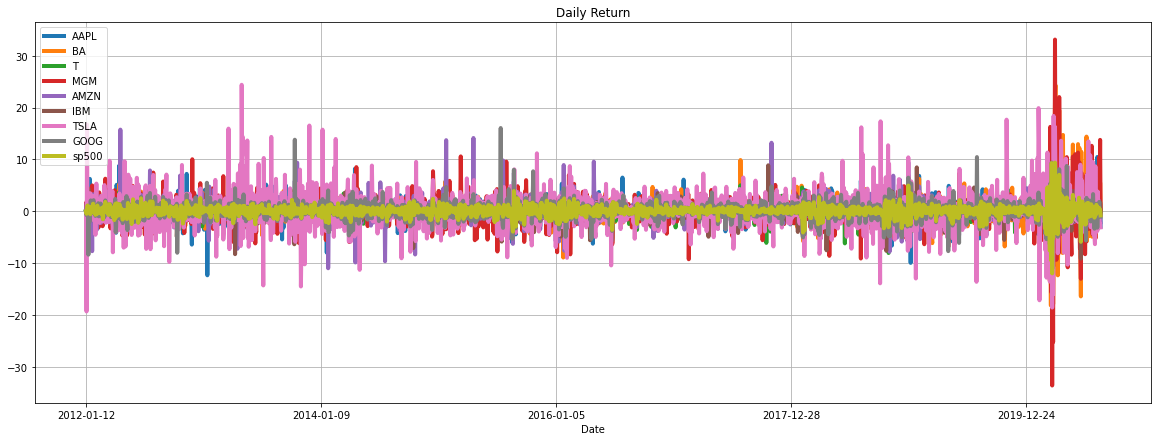

In [43]:
show_plot(daily_return(data),'Daily Return')

In [45]:
interactive_plot(daily_return(data),'Daily Return')

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [47]:
# Daily Return Correlation
df = daily_return.drop(columns = ['Date']).corr()

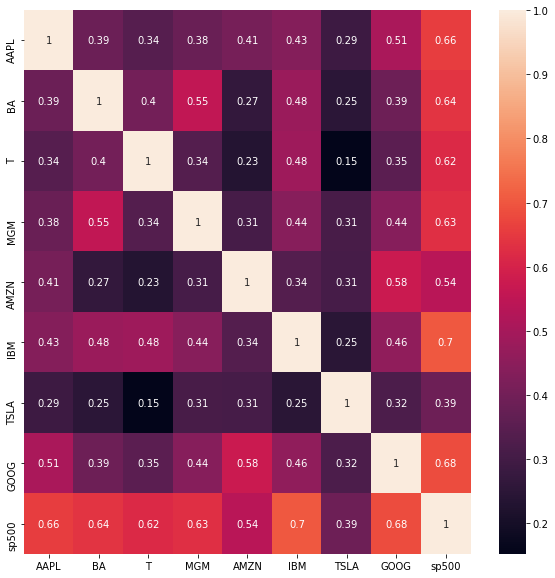

In [48]:
plt.figure(figsize =(10,10))
ax = plt.subplot()
sns.heatmap(df, annot = True, ax = ax);

In [ ]:
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
# The strong positive correlation between S&P500 and almost all the other stocks is because those stocks are indexed in S&P500
# Almost no correlation between Amazon and Beoing - totally different sectors
# Amazon has picked its value because of the pandemic, the need to order everything from home hasd become a daily routine, and also with the pandemic internationals flights have been dropping a lot, it is forbidden in some countries to fly internationaly
# Some correlation exists between MGM and Boeing (Hotel and Airlines), it almost explains itself, more flights = more hotel reserva

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

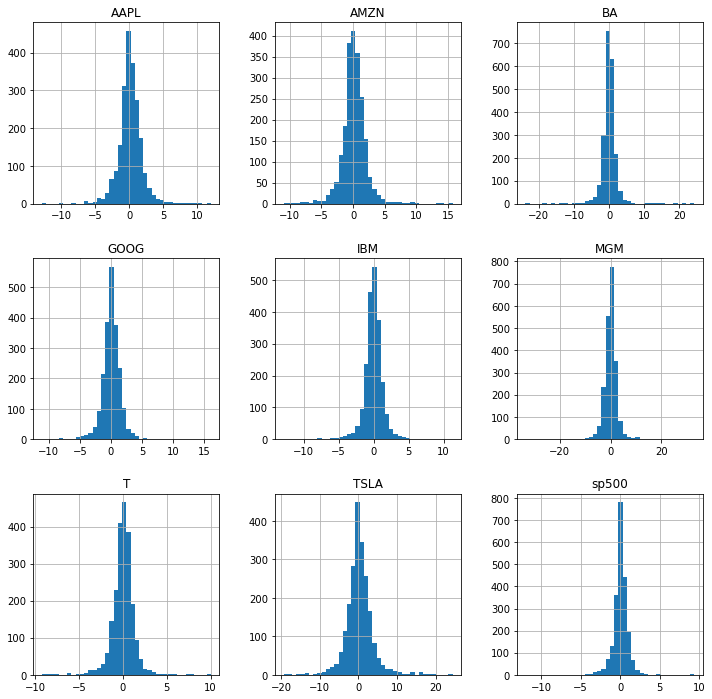

In [49]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
daily_return.hist(figsize = (12,12),bins = 40);

In [ ]:
# Tesla standard deviation is much larger compared to T indicating a more risky security

In [51]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = daily_return.copy()

df_hist = df_hist.drop(columns = ['Date'])

dat = []

for i in df_hist.columns:
    dat.append(daily_return[i].values)
dat    

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [52]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio
fig = ff.create_distplot(dat, df_hist.columns)
fig.show()